![school](dom-fou-YRMWVcdyhmI-unsplash.jpg)

# Initial Regression Model
### Normalizing and formatting data appropriately
For the categorical varaibles, as discovered in my EDA notebook, I'll create dummy columns and display boolean values.

In [186]:
#import the appropriate tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.figure_factory import create_scatterplotmatrix
%matplotlib inline

In [176]:
#import the data
df = pd.read_csv('test_scores 2.csv')
#fix dtypes
for column in df.columns:
    print(column,':',df[column].dtypes)

school : object
school_setting : object
school_type : object
classroom : object
teaching_method : object
n_student : float64
student_id : object
gender : object
lunch : object
pretest : float64
posttest : float64


In [177]:
#create dummies for categorical variables
# cols_to_fix = ['school','school_setting','school_type','classroom','teaching_method','gender','lunch']
cols_to_fix = ['school_type','teaching_method','gender','lunch']
dummies = pd.DataFrame()
for item in cols_to_fix:
    new = pd.get_dummies(df[item],prefix=item,drop_first=True)
    dummies = pd.concat([dummies,new],axis=1)

In [178]:
#drop og columns
df.drop(cols_to_fix,axis=1,inplace=True)
df = df.drop(['student_id'],axis=1)

In [179]:
#attach og to dummies
df = pd.concat([df,dummies],axis=1)
#create score difference column
df=df.rename(columns={"lunch_Qualifies for reduced/free lunch": "free_lunch"})
df.head()

,school,school_setting,classroom,n_student,pretest,posttest,school_type_Public,teaching_method_Standard,gender_Male,free_lunch
0,ANKYI,Urban,6OL,20.0,62.0,72.0,0,1,0,0
1,ANKYI,Urban,6OL,20.0,66.0,79.0,0,1,0,0
2,ANKYI,Urban,6OL,20.0,64.0,76.0,0,1,1,0
3,ANKYI,Urban,6OL,20.0,61.0,77.0,0,1,0,0
4,ANKYI,Urban,6OL,20.0,64.0,76.0,0,1,1,0


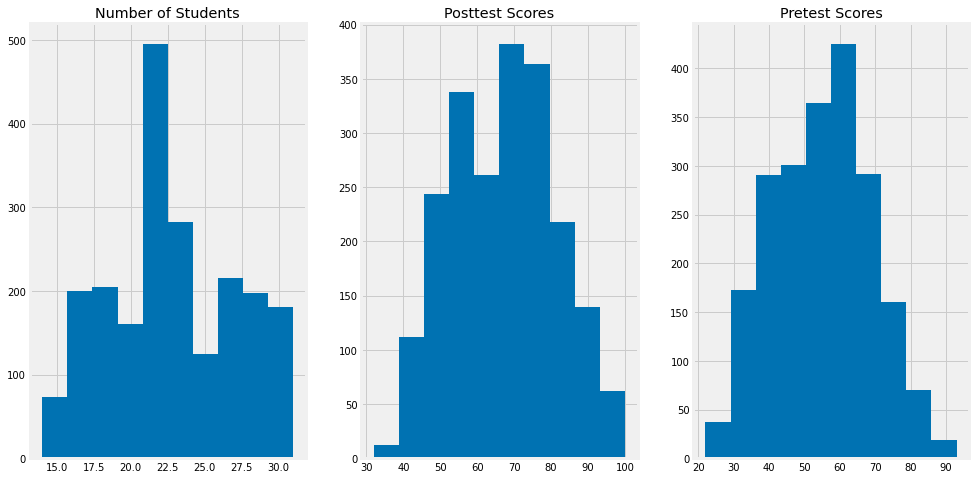

In [190]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,nrows=1,figsize=(15,8))
plt.style.use('seaborn-colorblind')
ax1.hist(df['n_student'],label='Number of Students')
ax2.hist(df['posttest'])
ax3.hist(df['pretest'])
ax1.title.set_text('Number of Students')
ax2.title.set_text('Posttest Scores')
ax3.title.set_text('Pretest Scores');

In [183]:
#check lin reg assumptions
outcome = 'posttest'
predictors = df.drop(['posttest','pretest'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               posttest   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     433.8
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:49:16   Log-Likelihood:                -5361.5
No. Observations:                2133   AIC:                         1.092e+04
Df Residuals:                    2034   BIC:                         1.148e+04
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     45.8049      0.332    137.868      0.000      45.153      46.456
school[T.CCAAW]                1.4196      0.240      5.922      0.000       0.950       1.890
school[T.CIMBB]               11.2914      0.290     38.973      0.000      10.723      11.860
school[T.CUQAM]                0.2200      0.234      0.940      0.347      -0.239       0.679
school[T.DNQDD]               -7.0072      0.224    -31.254      0.000      -7.447      -6.568
school[T.FBUMG]               11.1165      0.307     36.183      0.000      10.514      11.719
school[T.GJJHK]               -6.2822      0.238    -26.408      0.000      -6.749      -5.816
school[T.GOKXL]                3.3100      0.274     12.097      0.000       2.773       3.847
school[T.GOOBU]              -10.7436      0.225    -47.722      0.000     -11.185     -10.302
school[T.IDGFP]               17.4639      0.550     31.750      0.000      16.385      18.543
school[T.KFZMY]              -10.9467      0.303    -36.116      0.000     -11.541     -10.352
school[T.KZKKE]               -7.2233      0.255    -28.284      0.000      -7.724      -6.722
school[T.LAYPA]               11.7810      0.291     40.527      0.000      11.211      12.351
school[T.OJOBU]                7.9442      0.262     30.322      0.000       7.430       8.458
school[T.QOQTS]                0.7486      0.222      3.376      0.001       0.314       1.183
school[T.UAGPU]                0.4334      0.251      1.725      0.085      -0.059       0.926
school[T.UKPGS]               15.0569      0.232     64.781      0.000      14.601      15.513
school[T.UUUQX]                4.0529      0.251     16.129      0.000       3.560       4.546
school[T.VHDHF]                3.6977      0.314     11.787      0.000       3.082       4.313
school[T.VKWQH]                4.5468      0.248     18.322      0.000       4.060       5.033
school[T.VVTVA]              -13.5928      0.242    -56.192      0.000     -14.067     -13.118
school[T.ZMNYA]                4.0833      0.260     15.726      0.000       3.574       4.593
school[T.ZOWMK]              -10.4143      0.237    -43.858      0.000     -10.880      -9.949
school_setting[T.Suburban]    11.7567      0.139     84.826      0.000      11.485      12.029
school_setting[T.Urban]       -1.1247      0.183     -6.147      0.000      -1.483      -0.766
classroom[T.08N]               8.3169      0.606     13.736      0.000       7.129       9.504
classroom[T.0N7]             -11.1090      0.522    -21.274      0.000     -12.133     -10.085
classroom[T.18K]              -0.0517      0.506     -0.102      0.919      -1.044       0.940
classroom[T.197]               4.7249      0.668      7.075      0.000       3.415       6.034
classroom[T.1Q1]               1.2026      

In [187]:
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
list(zip(name, test))

[('Jarque-Bera', 3.9747928516523525),
 ('Prob', 0.13705178582893712),
 ('Skew', -0.006669477216010241),
 ('Kurtosis', 3.211058001289193)]

> **Comments:** The Jarque-Bera result is about halfway between 0 and 6... need to do research on how best to interperet...the p-value of 0.13 is slightly too high to reject the null hypothesis for normality. The level of skew and kurtosis are in favor of normality.

# Checking for Normality

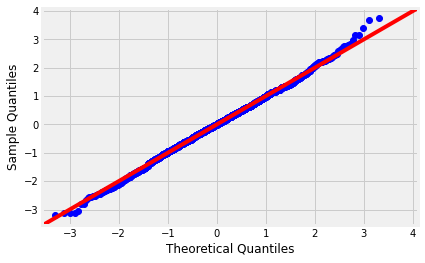

In [184]:
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

> **Comments:** Overall looks good, would like to drop that outlier. Both ends tip up a bit might try a transformation or two to further normalize that

# Check for Homoscedasticity

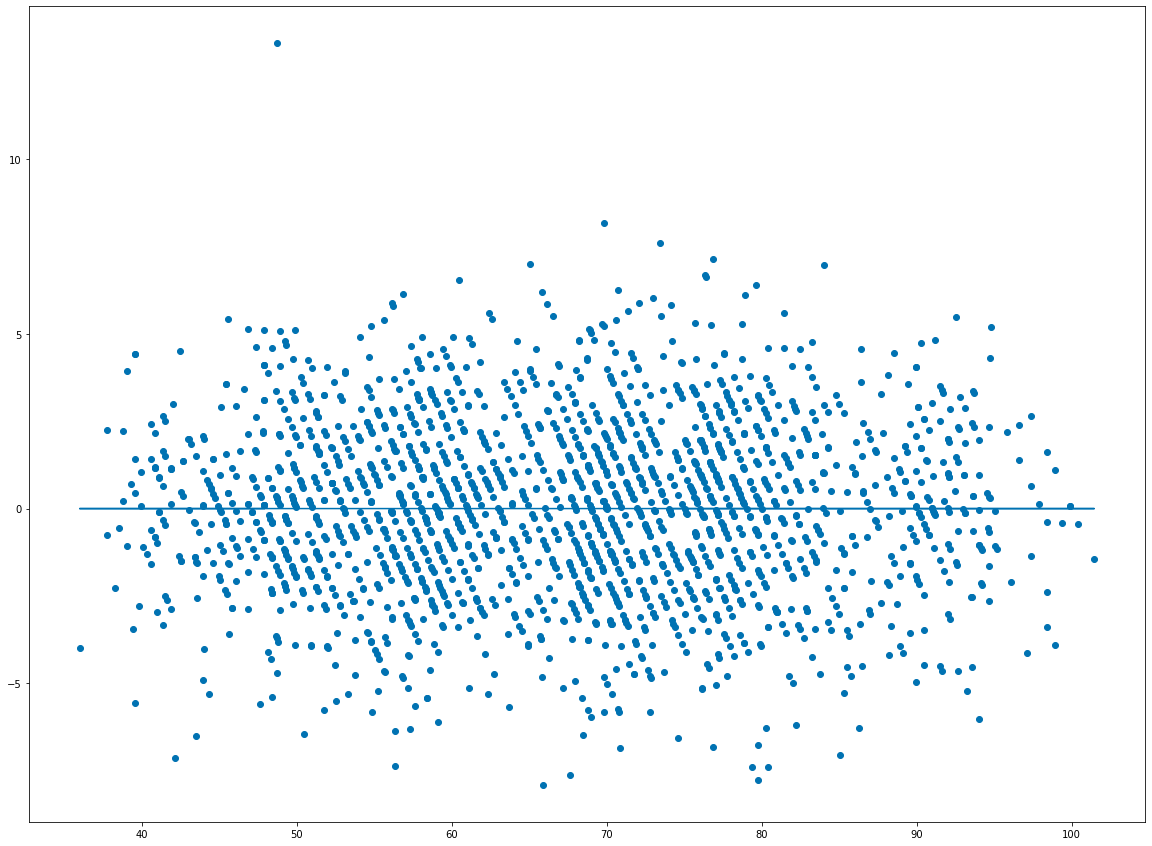

In [101]:
plt.figure(figsize=(20, 15))
plt.scatter(model.predict(df), model.resid)
plt.plot(model.predict(df), [0 for i in range(len(df))]);

> **Comments:** Overall looks good, again with the one outlier. Actually quite happy with the level of homoscedacity.

# Model Refinement

In [38]:
#normalize and scale

In [58]:
# engineer a feature
# df['score_growth'] = df.posttest-df.pretest
# try OHE n_student

In [ ]:
#recursive modeling

In [ ]:
#build a preditor function

In [ ]:
#dashapp using predictor function